## Model 3 Fit Results

In [2]:
setwd("/global/project/projectdirs/m1532/Projects_MVP/geospatial/GeoSpatial_Model/spatial-prediction")

In [3]:
library(CARBayesST)
library(tidyverse)

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [4]:
fit3 <- readRDS("outputs/model_results/AR2model_2022-09-13.rds")

In [5]:
#get fips to keep 

# Note: United States total includes 3,006 counties;
## Loading dataset and geometries ###
vars <- read_csv("data/processed/combined.csv")
# change this to the number of years that 
# you are considering in your dataset.
NUMBER_OF_YEARS <- length(unique(vars$year))


county <- sf::read_sf(
    dsn = "data/shapefile/cb_2020_us_tract_500k",
    layer = "cb_2020_us_tract_500k"
)

county <- county %>%
    mutate(FIPSCODE = paste0(STATEFP, COUNTYFP)) %>% 
    arrange(FIPSCODE) %>%
    distinct(FIPSCODE, .keep_all = TRUE)

df <- county %>% inner_join(vars, on=FIPSCODE)

df_nona <- df %>% na.omit(suicide_rate) %>%
  group_by(FIPSCODE) %>% 
  mutate(name_count = n()) %>%
  ungroup() %>% 
  filter(name_count == NUMBER_OF_YEARS) %>% 
  dplyr::select(-name_count) %>%
  arrange(desc(year), FIPSCODE)

fips_to_keep <- df_nona %>% 
    distinct(FIPSCODE) %>% 
    pull(FIPSCODE)


Rows: 9089 Columns: 103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): FIPSCODE, county
dbl (101): deaths, ACS_PCT_GRP_QRT, ACS_PCT_PRIVATE_2, mean_temp, ACS_PCT_ME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“PROJ: proj_identify: Open of /global/homes/b/bbrusco/.conda/envs/r-venv/share/proj failed (GDAL error 1)”
Joining, by = "FIPSCODE"


In [8]:
fit3$summary.results

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-8.4831,-9.7844,-7.0757,70000,45.7,124.8,1.0
ACS_PCT_GRP_QRT,0.9802,0.1623,1.7779,70000,45.7,205.2,-2.3
ACS_PCT_PRIVATE_2,0.0276,-2.1603,2.3142,70000,45.7,640.0,1.5
mean_temp,0.5313,0.2288,0.8400,70000,45.7,171.6,2.3
ACS_PCT_MEDICARE_ONLY,3.1821,1.6624,4.7296,70000,45.7,364.2,0.8
ACS_PCT_PRIVATE_SELF,2.3923,1.5962,3.2431,70000,45.7,267.0,-1.9
ACS_PCT_MOBILE_HOME,0.1536,-0.2212,0.5373,70000,45.7,168.3,-2.5
NHC_DAILY_RES,-2.3227,-2.8550,-1.8487,70000,45.7,89.1,2.3
ACS_PCT_NON_CITIZEN,-0.1641,-1.4278,1.0592,70000,45.7,122.0,2.8
ACS_PCT_TRICARE_VA,1.1668,-0.2626,2.6765,70000,45.7,207.1,0.9


#### Comments

- Note: compared to the AR1 model, here we have two estimated rho2.T, since we have two temporal correlation parameters (with year lag 1 and year lag 2)

In [7]:
str(fit3$samples)

List of 6
 $ beta  : 'mcmc' num [1:70000, 1:88] -8.56 -8.53 -8.44 -8.41 -8.45 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ phi   : 'mcmc' num [1:70000, 1:9087] -0.83 -0.491 -0.491 -0.547 -0.296 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ rho   : 'mcmc' num [1:70000, 1:3] 0.51 0.513 0.515 0.515 0.518 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "rho.S" "rho1.T" "rho2.T"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ tau2  : 'mcmc' num [1:70000, 1] 0.3 0.29 0.283 0.288 0.276 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ fitted: 'mcmc' num [1:70000, 1:9087] 7.38 10.34 10.31 9.79 12.39 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ Y     : 'mcmc' logi NA
  ..- attr(*, "mcpar")= num [1:3] 1 1 1


In [10]:
true_values <- read_csv("data/raw/suicide/2018.csv", show_col_types=F) %>%
        filter(fips %in% fips_to_keep) %>%
        arrange(fips) %>%
        select(Deaths) %>%
        pull()


In [11]:
fitted_values <- fit3$fitted[6059:9087]

In [12]:
results_df <- tibble(
    fitted_values = fitted_values,
    true_values = true_values,
    FIPSCODE = fips_to_keep
)


In [13]:
top_true <- results_df %>%
    arrange(desc(true_values)) %>%
    head(6) %>%
    mutate(top5_true = 1)
top_true

fitted_values,true_values,FIPSCODE,top5_true
<dbl>,<dbl>,<chr>,<dbl>
825.8604,947,06037,1
676.5585,737,04013,1
481.3270,481,48201,1
413.1896,465,32003,1
418.0943,459,17031,1
407.8377,448,06073,1


In [14]:
top_fitted <- results_df %>%
    arrange(desc(fitted_values)) %>%
    head(6)
top_fitted

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
825.8604,947,06037
676.5585,737,04013
481.3270,481,48201
418.0943,459,17031
413.1896,465,32003
407.8377,448,06073


# Coefficients
Order by effect size of the coefficient (note: coefficients have not been standardized)

In [15]:
fit3$summary %>%
    as_tibble(rownames=NA) %>%
    arrange(desc(abs(Mean)))

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACS_PCT_1UP_PERS_1ROOM,10.6779,5.1427,16.6452,70000,45.7,28.0,5.2
(Intercept),-8.4831,-9.7844,-7.0757,70000,45.7,124.8,1.0
ACS_PCT_1UP_OWNER_1ROOM,-7.9541,-12.4118,-3.3995,70000,45.7,64.5,-7.1
ACS_PCT_WHOLESALE,5.3989,3.7525,6.9832,70000,45.7,586.1,-3.1
ACS_PCT_AGE_0_17,4.9574,3.5931,6.4276,70000,45.7,84.0,2.5
ACS_PCT_NATURE,4.4203,3.8005,5.0633,70000,45.7,9.4,-1.2
ACS_PCT_COMMT_29MIN,-4.3701,-5.4849,-3.3993,70000,45.7,26.0,4.3
ACS_PCT_AGE_0_4,-4.3568,-7.3459,-1.3418,70000,45.7,229.2,-3.2
ACS_PCT_ADMIN,3.9455,2.9254,5.0542,70000,45.7,224.0,-4.4


# Residuals Analysis

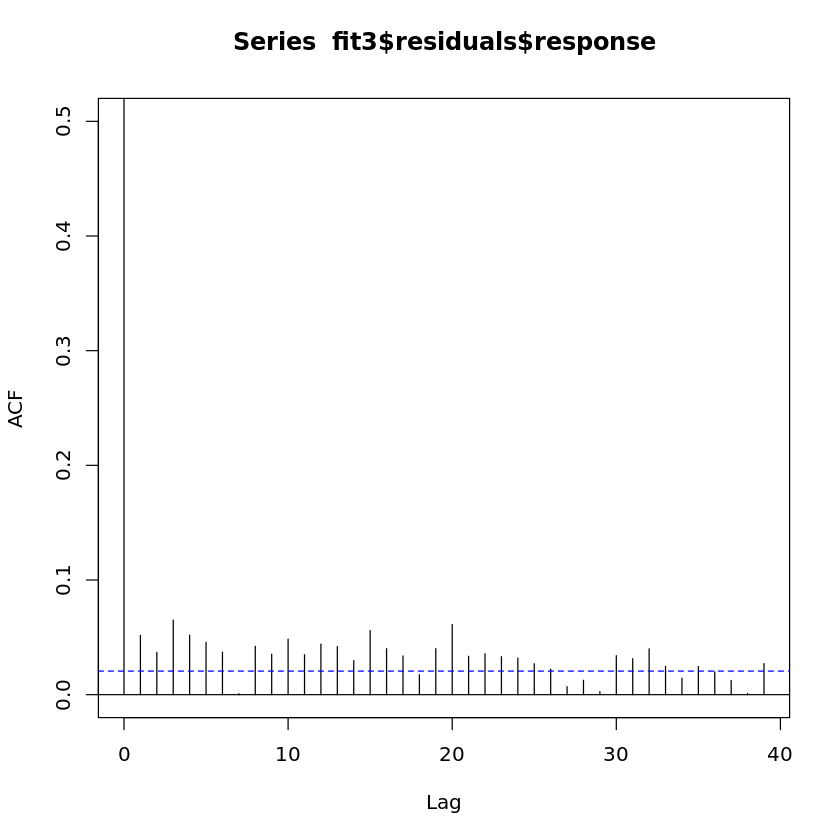

In [16]:
acf(fit3$residuals$response,type="correlation",ylim=c(0,0.5))

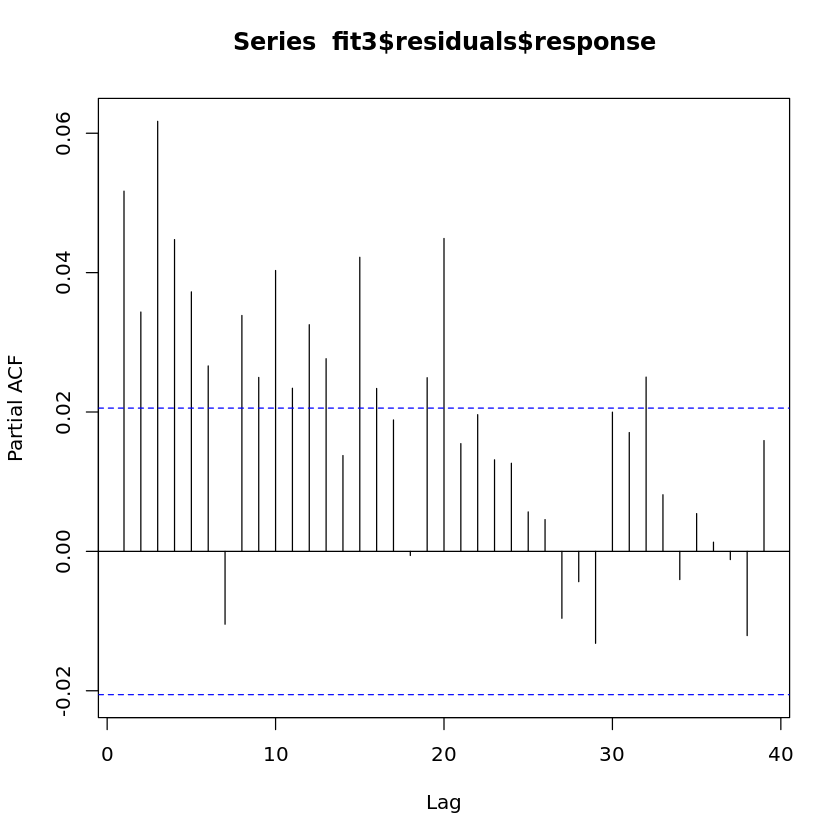

In [17]:
acf(fit3$residuals$response,type="partial")

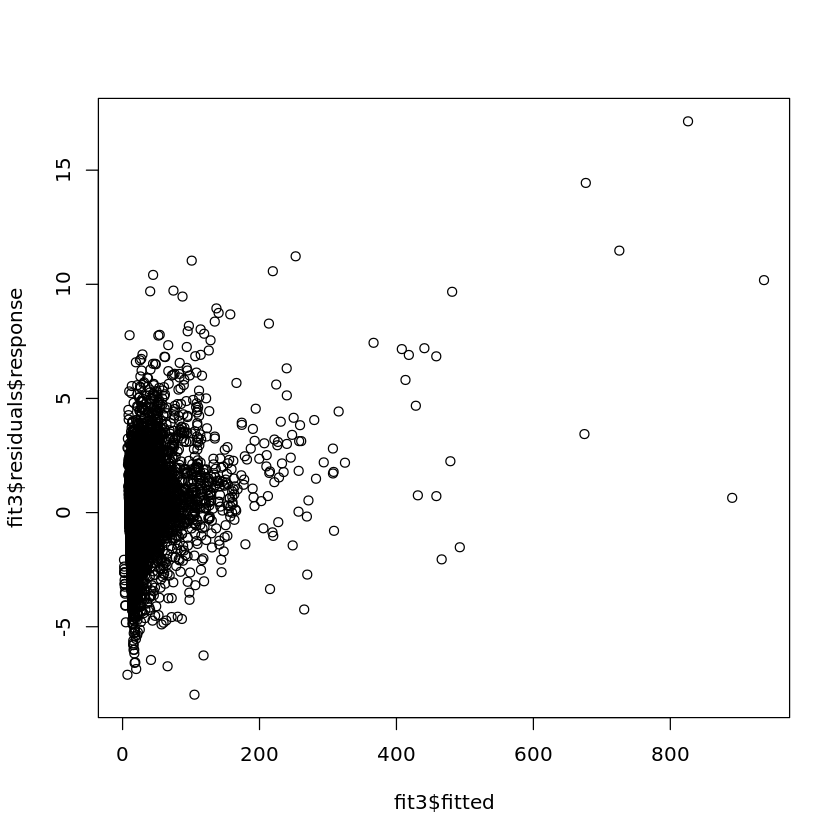

In [19]:
plot(fit3$fitted, fit3$residuals$response)

## Rates


In [21]:

demographic_info <- read_csv("data/raw/demo/2020-demographic-info.csv")
demographic_info <- demographic_info %>%
    mutate(FIPSCODE = paste0(STATE, COUNTY)) %>%
    select(FIPSCODE, CENSUS2010POP) %>%
    rename(pop=CENSUS2010POP) %>%
    mutate(pop=as.numeric(pop))

results_df <- results_df %>% 
    merge(demographic_info) %>%
    mutate(true_rate1000 = true_values / pop * 1000,
           fit_rate1000 = fitted_values / pop * 1000)



Rows: 3194 Columns: 180
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): SUMLEV, STATE, COUNTY, STNAME, CTYNAME, CENSUS2010POP
dbl (174): REGION, DIVISION, ESTIMATESBASE2010, POPESTIMATE2010, POPESTIMATE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [22]:
# RMSE

caret::RMSE(fitted_values,true_values)

caret::RMSE(results_df$fit_rate1000,results_df$true_rate1000)

[1] 13.82492

[1] 2.035217

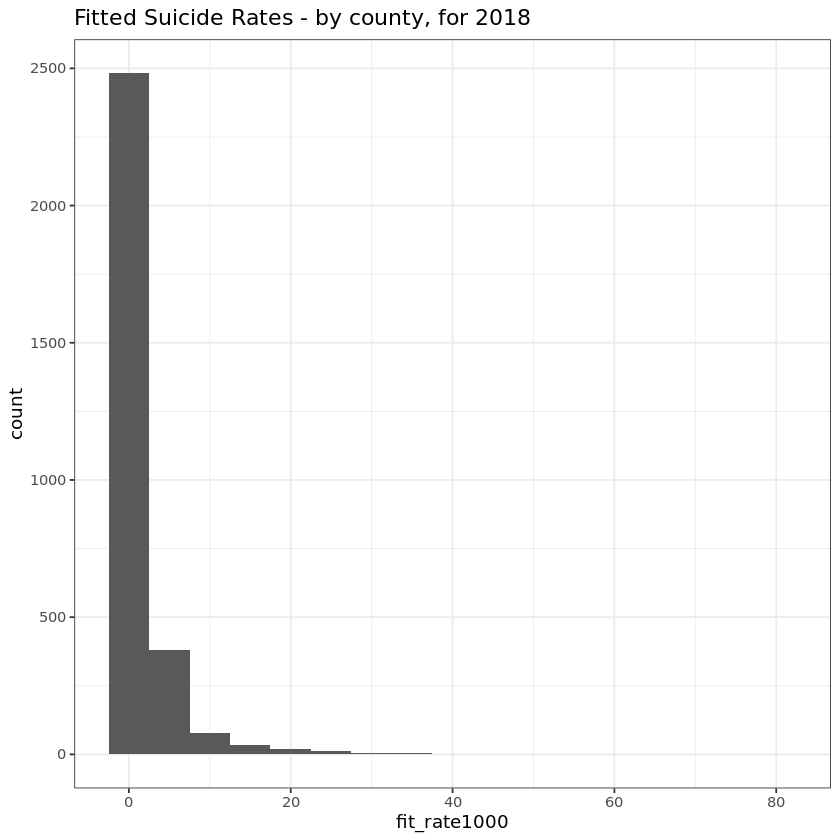

In [23]:
# histogram of fitted rate
# could be used to decide what constitues a high suicide rate
results_df %>% ggplot(aes(x=fit_rate1000)) + 
    geom_histogram(binwidth=5) +
    theme_bw() + 
    ggtitle("Fitted Suicide Rates - by county, for 2018")